# Adult Dataset :
- This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics).

- In this Dataset we have 48842 observation and 15 attributes including target attribute(income).
- Where it have Categorical and numeric variabels in attribute.
-  Attributes with numeric values are 'age','fnlwgt', 'educational-num', 'capital-gain', 'capital-loss' and         'hours-per-week'.
-  Attributes with categorical values are 'workclass', 'education', 'marital-status', 'occupation',            'relationship','race', 'gender' and 'income'.


**Attribute Information :**
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
- income: >50K, <=50K



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
df=pd.read_csv("adult.csv",na_values=["?"])

In [3]:
df.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df=df.drop("fnlwgt",axis=1)

In [5]:
df.describe(include="object")

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,46043,48842,48842,46033,48842,48842,48842,47985,48842
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33906,15784,22379,6172,19716,41762,32650,43832,37155


In [6]:
df["income"].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

# Handling Missing Values

In [7]:
df.isnull().sum()

age                   0
workclass          2799
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
df.isnull().sum()/len(df.index)*100

age                0.000000
workclass          5.730724
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

In [9]:
df=df[df.isnull().sum(axis=1)<1]

In [10]:
(1-len(df.index)/48842)*100

7.411653904426519

-  ***Percentage of missing data is 7.41%***

In [11]:
df.head(2)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


- All the missing values were removed 

--------------------------

# Data Preparation :


In [12]:
df.head(3)

,age,workclass,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K


In [13]:
target= df["income"]

- ***Target column is income***

In [14]:
data=df.drop("income",axis=1)


-----------------------------------

## Dividing data into numerical and categorical data : -

In [15]:
numerical= df.select_dtypes(include=["int64","float64"])

In [16]:
numerical.head(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,25,7,0,0,40
1,38,9,0,0,50


In [17]:
categorical= data.select_dtypes(include=['object'])

In [18]:
categorical.head(2)

,workclass,education,marital-status,occupation,relationship,race,gender,native-country
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States


### Standardising  Numerical Data

In [19]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
numerical_df=pd.DataFrame(scale.fit_transform(numerical),columns=numerical.columns)

In [20]:
numerical_df

,age,educational-num,capital-gain,capital-loss,hours-per-week
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942
...,...,...,...,...,...
45217,-0.873671,0.737034,-0.146733,-0.21878,-0.244684
45218,0.109857,-0.438122,-0.146733,-0.21878,-0.078120
45219,1.471665,-0.438122,-0.146733,-0.21878,-0.078120
45220,-1.251951,-0.438122,-0.146733,-0.21878,-1.743763


In [21]:
numerical_df.describe()

,age,educational-num,capital-gain,capital-loss,hours-per-week
count,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04,4.522200e+04
mean,-2.545397e-17,1.693789e-16,-1.476958e-17,2.647527e-17,2.165158e-16
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00
min,-1.630231e+00,-3.571870e+00,-1.467332e-01,-2.187803e-01,-3.326124e+00
25%,-7.980149e-01,-4.381216e-01,-1.467332e-01,-2.187803e-01,-7.812006e-02
50%,-1.171110e-01,-4.640300e-02,-1.467332e-01,-2.187803e-01,-7.812006e-02
75%,6.394489e-01,1.128753e+00,-1.467332e-01,-2.187803e-01,3.382907e-01
max,3.892656e+00,2.303909e+00,1.317519e+01,1.053806e+01,4.835527e+00


### One Hot Encoding on the Categorical Dataset


In [22]:
from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(drop="first",sparse=False)
cat_df= encoder.fit_transform(categorical)#,columns=encoder.get_features_names(categorical.coulmns) )


In [23]:
cat_df=pd.DataFrame(cat_df,columns=encoder.get_feature_names(categorical.columns))

In [24]:
cat_df

,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,education_1st-4th,education_5th-6th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45217,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45218,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45219,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45220,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


-------------------

## Concatenating both the numerical and categorical data again

In [25]:
data=pd.concat([numerical_df,cat_df],axis=1)

In [26]:
data.head(5)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,-1.024983,-1.221559,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.041455,-0.438122,-0.146733,-0.21878,0.754701,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.798015,0.737034,-0.146733,-0.21878,-0.078120,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.412481,-0.046403,0.877467,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.344079,-1.613277,-0.146733,-0.21878,-0.910942,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


***- Our data is ready to test and train***

### Splitting the dataset into train and test 

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,ytest=train_test_split(data,target,train_size=0.7,random_state=0)

# Training the model on the training data

In [28]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=1000)


In [29]:
classifier.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [30]:
y_pred=classifier.predict(X_test)

# Evaluating the model : -

In [31]:
from sklearn import metrics

ac=metrics.accuracy_score(y_pred,ytest)

print("accuracy of our model is =",ac)

accuracy of our model is = 0.8409375691014963


- Accuracy of the model is 84%

In [32]:
a=metrics.confusion_matrix(y_pred,ytest)

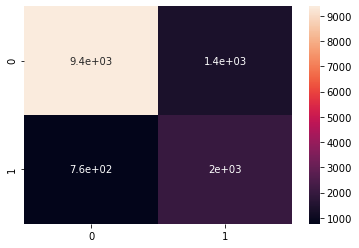

In [33]:
sns.heatmap(a,annot=True)

- Confusion matrix

In [34]:
from sklearn.metrics import precision_score,recall_score

In [35]:
precision_score(ytest,y_pred,pos_label="<=50K")

0.870590419606387

In [36]:
recall_score(ytest,y_pred,pos_label="<=50K")

0.9246696903963715

In [37]:
print(metrics.classification_report(ytest,y_pred))
# number of the column=95

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90     10142
        >50K       0.73      0.59      0.65      3425

    accuracy                           0.84     13567
   macro avg       0.80      0.76      0.77     13567
weighted avg       0.83      0.84      0.84     13567



-----------------------

In [38]:
# Usinng  RFE to extract the best features.
# Building a Logistic regression model using the best features
# Testing  and Evaluating  the new model


In [39]:
X_train.head(2)

,age,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
10300,0.639449,0.737034,-0.146733,-0.21878,-0.078120,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
39302,-1.100639,-0.046403,-0.146733,-0.21878,-2.576584,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


----------------------------

## RFE(Recursive Features Elimination) : - 

In [40]:
from sklearn.linear_model import  LogisticRegression
clas_temp = LogisticRegression(max_iter=1000)

In [41]:
from sklearn.feature_selection import RFE
rfe=RFE(clas_temp,n_features_to_select=20)


In [42]:
rfe=rfe.fit(X_train,y_train)

In [43]:
rdf=pd.DataFrame({"columns":X_train.columns,"Included":rfe.support_,"ranking":rfe.ranking_})

In [44]:
rdf.shape

(95, 3)

In [45]:
rdf

,columns,Included,ranking
0,age,False,15
1,educational-num,True,1
2,capital-gain,True,1
3,capital-loss,False,36
4,hours-per-week,False,16
...,...,...,...
90,native-country_Thailand,False,11
91,native-country_Trinadad&Tobago,False,2
92,native-country_United-States,False,22
93,native-country_Vietnam,True,1


In [46]:
new_cols=X_train.columns[rfe.support_]
len(new_cols)

20

In [47]:
X_train_new=X_train[new_cols]

In [48]:
X_train_new.shape

(31655, 20)

In [49]:
X_test_new = X_test[new_cols]

In [50]:
X_test_new.shape

(13567, 20)

In [51]:
from sklearn.linear_model import LogisticRegression
new_classifier=LogisticRegression()

In [52]:
new_classifier.fit(X_train_new,y_train)

LogisticRegression()

In [53]:
ypred=new_classifier.predict(X_test_new)

In [54]:
accu=metrics.accuracy_score(ytest,ypred)
print("accuracy is =",accu)

accuracy is = 0.8301024544851477


**- Accuracy is 83%**

In [55]:
con_mat=metrics.confusion_matrix(ytest,ypred)

In [56]:
con_mat

array([[9471,  671],
       [1634, 1791]], dtype=int64)

**- Confusion Matrix**

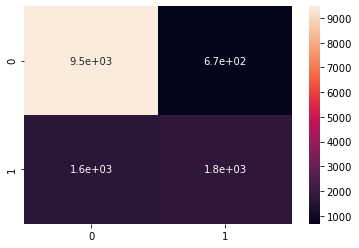

In [57]:
sns.heatmap(con_mat,annot=True)

In [58]:
precision_score(ytest,ypred,pos_label="<=50K")

0.8528590724898695

In [59]:
recall_score(ytest,ypred,pos_label="<=50K")

0.9338394793926247

### After performing RFE classification report of the Logistic Rgression  model :

In [60]:
print(metrics.classification_report(ytest,ypred))
#  Here number of the column=20

              precision    recall  f1-score   support

       <=50K       0.85      0.93      0.89     10142
        >50K       0.73      0.52      0.61      3425

    accuracy                           0.83     13567
   macro avg       0.79      0.73      0.75     13567
weighted avg       0.82      0.83      0.82     13567



# Observation :
- Using 95 features accuracy of the logistic regressor model was 84%.
- After performing RFE now using 20 feature our accuracy changes to 83%.
- Through this we can say that even after removing 75 features our model had maintain the accuracy

-------------------------------------

# PCA(Principal Component Analysis) : -

In [61]:
data.shape

(45222, 95)

In [62]:
from sklearn.decomposition import PCA
pca_temp=PCA(random_state=0)

In [63]:
pca_temp.fit(X_train)

PCA(random_state=0)

Text(0, 0.5, 'variance')

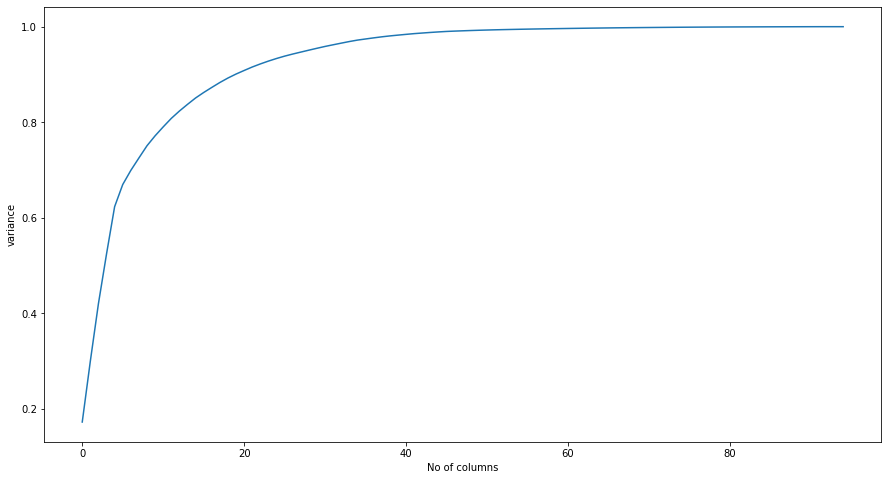

In [64]:
plt.figure(figsize=(15,8))
plt.plot(np.cumsum(pca_temp.explained_variance_ratio_))
plt.xlabel("No of columns")
plt.ylabel("variance")

In [65]:
np.cumsum(pca_temp.explained_variance_ratio_)

array([0.1729332 , 0.30040379, 0.42062527, 0.52452954, 0.62344976,
       0.66971427, 0.69933893, 0.72535624, 0.75096374, 0.77170361,
       0.79035209, 0.80813977, 0.82348085, 0.83746244, 0.85083449,
       0.86229799, 0.87291163, 0.8832404 , 0.89259524, 0.90093091,
       0.90837929, 0.91563827, 0.92208802, 0.92802815, 0.93345064,
       0.93839527, 0.94277272, 0.94685142, 0.95090049, 0.95484977,
       0.95869284, 0.96217366, 0.96558139, 0.96894669, 0.9719461 ,
       0.9742803 , 0.97660789, 0.97878001, 0.9806907 , 0.98234003,
       0.98394638, 0.98547263, 0.98672289, 0.98794618, 0.98904995,
       0.99004737, 0.99074627, 0.99137805, 0.99197418, 0.99251975,
       0.99301532, 0.9934599 , 0.99386441, 0.99421605, 0.99456491,
       0.99488997, 0.99519583, 0.99548892, 0.99576452, 0.99602375,
       0.99628033, 0.99652361, 0.99675934, 0.99699117, 0.99720526,
       0.99741808, 0.99762968, 0.99780455, 0.99797108, 0.99813383,
       0.99828735, 0.99843366, 0.99857258, 0.99870823, 0.99883

In [66]:
from sklearn.decomposition import PCA
pca_new=PCA(n_components=20,random_state=0)

In [67]:
X_train_pca=pca_new.fit_transform(X_train)   #Xtrain data after pca

In [68]:
X_test_pca=pca_new.transform(X_test)        #test data after pca

-----------------------

# 1) Logistic Regression model after PCA : -

In [69]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()

In [70]:
classifier.fit(X_train_pca,y_train)

LogisticRegression()

In [71]:
y_pred_pca=classifier.predict(X_test_pca)

In [72]:
accu_logR=metrics.accuracy_score(ytest,y_pred_pca)
print("accuracy is =",accu_logR)

accuracy is = 0.8367361981278101


**Accuracy of the logistic regression model is 84%**

In [73]:
mat=metrics.confusion_matrix(ytest,y_pred_pca)

In [74]:
print(mat)

[[9388  754]
 [1461 1964]]


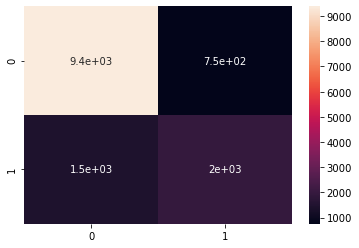

In [75]:
sns.heatmap(mat,annot=True)

In [76]:
precision_score(ytest,y_pred_pca,pos_label="<=50K")

0.8653332104341414

In [77]:
recall_score(ytest,y_pred_pca,pos_label="<=50K")

0.925655689213173

In [78]:
print(metrics.classification_report(ytest,y_pred_pca))
# Number of columns =20

              precision    recall  f1-score   support

       <=50K       0.87      0.93      0.89     10142
        >50K       0.72      0.57      0.64      3425

    accuracy                           0.84     13567
   macro avg       0.79      0.75      0.77     13567
weighted avg       0.83      0.84      0.83     13567



-----------------------

# 2) KNN model after PCA :-

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [80]:
knn.fit(X_train_pca,y_train)

KNeighborsClassifier()

In [81]:
y_pred_knn=knn.predict(X_test_pca)


In [82]:
accu_knn=metrics.accuracy_score(ytest,y_pred_knn)
print(accu)

0.8301024544851477


**- Accuracy of the KNN model is 82.57%**

In [83]:
metrics.confusion_matrix(ytest,y_pred_knn)

array([[9134, 1008],
       [1356, 2069]], dtype=int64)

**- Confusion matrix**

In [84]:
print(metrics.classification_report(ytest,y_pred_knn))
# Number of the columns =20

              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.89     10142
        >50K       0.67      0.60      0.64      3425

    accuracy                           0.83     13567
   macro avg       0.77      0.75      0.76     13567
weighted avg       0.82      0.83      0.82     13567



----------------------

# 3) SVM model after PCA : -

In [85]:
from sklearn.svm import SVC
svm=SVC()

In [86]:
svm.fit(X_train_pca,y_train)

SVC()

In [87]:
y_pred_svm=svm.predict(X_test_pca)

In [88]:
svm_accu=metrics.accuracy_score(ytest,y_pred_svm)
print(svm_accu)

0.8445492739736125


**Accuracy of the svm model is 84.45%**

In [89]:
metrics.confusion_matrix(ytest,y_pred_svm)

array([[9523,  619],
       [1490, 1935]], dtype=int64)

- Confusion matrix

In [90]:
print(metrics.classification_report(ytest,y_pred_svm))
# Number of the column = 20

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90     10142
        >50K       0.76      0.56      0.65      3425

    accuracy                           0.84     13567
   macro avg       0.81      0.75      0.77     13567
weighted avg       0.84      0.84      0.84     13567



-------------------

# 4) Decision Tree model after PCA : -

In [91]:
from sklearn.tree import DecisionTreeClassifier
dt_classifier=DecisionTreeClassifier(max_depth=None)



In [92]:
dt_classifier.fit(X_train_pca,y_train)

DecisionTreeClassifier()

In [93]:
y_pred_dt = dt_classifier.predict(X_test_pca)

In [94]:
dt_accu=metrics.accuracy_score(ytest,y_pred_dt)
print(dt_accu)

0.7972285693226211


**- Accuracy of DT model is 80%**

In [95]:
cn_dt=metrics.confusion_matrix(ytest,y_pred_dt)
print(cn_dt)

[[8853 1289]
 [1462 1963]]


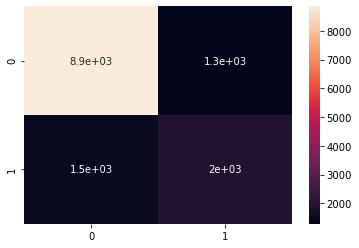

In [96]:
sns.heatmap(cn_dt,annot=True)

In [97]:
print(metrics.classification_report(ytest,y_pred_dt))
#Number of the column = 20

              precision    recall  f1-score   support

       <=50K       0.86      0.87      0.87     10142
        >50K       0.60      0.57      0.59      3425

    accuracy                           0.80     13567
   macro avg       0.73      0.72      0.73     13567
weighted avg       0.79      0.80      0.80     13567



----------------------


In [98]:
accuracy=[accu_logR,accu_knn,svm_accu,dt_accu]

acc_df=pd.DataFrame({"Model_Name":["LogisticRegressor","K-NearestNeighbor","SupportVectorClassifier","DecisionTree"],"Accuarcy":accuracy})

-------------------------------

# Observation  : -

**Overall Accuracy of the models:**

In [99]:
acc_df

,Model_Name,Accuarcy
0,LogisticRegressor,0.836736
1,K-NearestNeighbor,0.825754
2,SupportVectorClassifier,0.844549
3,DecisionTree,0.797229


- From the above table we can say that SVM gives out the best accuarcy as compare to the other models
- Using all the features of Dataset the accuracy of our LogisticRegressor was 84%.
- After doing rfe  and removing 75 features our accuarcy was still maintained by our model.
- Overall there was no effect on the accuarcy of the model even after removing many of the features.